In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

In [54]:
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [55]:
train = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_housing_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/KhaledElTahan/DeepLearning/master/Labs/lab1/lab1_housing_test.csv")

In [56]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
# Concatenate all the data
# We do this to be able to preprocess on the whole dataset
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

# Log transform the target y in training data - by reference inside all
train["SalePrice"] = np.log1p(train["SalePrice"])

# Log transform skewed numeric features:

# Get Numerical Fields
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index 

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewnessc
skewed_feats = skewed_feats[skewed_feats > 0.75] # Get Skewed Columns
skewed_feats = skewed_feats.index # Get Skewed Columns indices

# Log scale skewed columns
# Normalize the skewed distribution for better regression
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

# Create Dummy variables for the categorical features 
all_data = pd.get_dummies(all_data) 

# Replace the numeric missing values (NaN's) with the mean of their respective columns
all_data = all_data.fillna(all_data.mean())

# Split the data to training & testing
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Standardize features by removing the mean and scaling to unit variance
# z = (x - u) / s
X_train = StandardScaler().fit_transform(X_train)

#split training data into training & validation, default splitting is 25% validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [58]:
model = keras.Sequential()
model.add(Dense(1,input_shape=(X_tr.shape[1],),kernel_regularizer=regularizers.l2(0.1)))

In [59]:
model.compile(loss = "mean_squared_error", optimizer = "Adam")
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 289       
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [60]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 500)

Epoch 1/500
35/35 [==============================] - 1s 5ms/step - loss: 147.2062 - val_loss: 147.2394
Epoch 2/500
35/35 [==============================] - 0s 2ms/step - loss: 145.3190 - val_loss: 148.1759
Epoch 3/500
35/35 [==============================] - 0s 2ms/step - loss: 143.6806 - val_loss: 149.2300
Epoch 4/500
35/35 [==============================] - 0s 2ms/step - loss: 142.1358 - val_loss: 150.2806
Epoch 5/500
35/35 [==============================] - 0s 2ms/step - loss: 140.7442 - val_loss: 151.6037
Epoch 6/500
35/35 [==============================] - 0s 2ms/step - loss: 139.3278 - val_loss: 152.8650
Epoch 7/500
35/35 [==============================] - 0s 3ms/step - loss: 137.9389 - val_loss: 154.2615
Epoch 8/500
35/35 [==============================] - 0s 3ms/step - loss: 136.5972 - val_loss: 155.8165
Epoch 9/500
35/35 [==============================] - 0s 3ms/step - loss: 135.4464 - val_loss: 157.2916
Epoch 10/500
35/35 [==============================] - 0s 2ms/step - loss:

In [61]:
print(model.predict(X_test))

[[88.27033 ]
 [78.5196  ]
 [83.946304]
 ...
 [85.21169 ]
 [72.221985]
 [87.933044]]


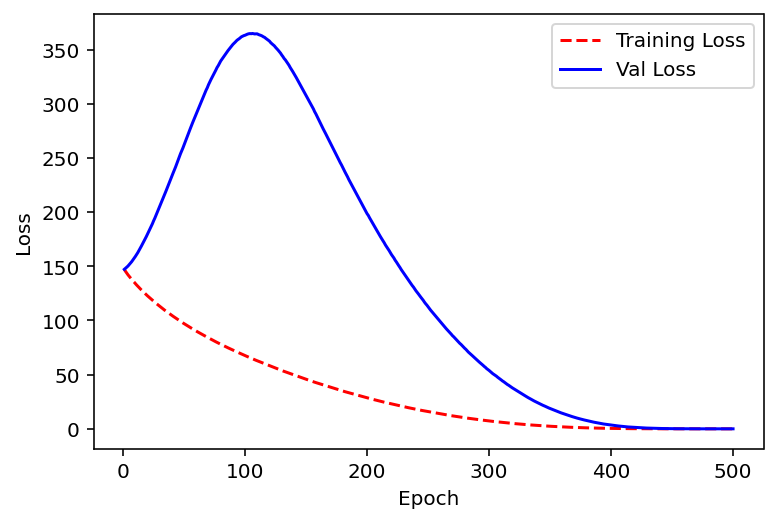

In [62]:
# Get training and test loss histories
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()